# Comparative Genomics of Genes for rhamnolipid synthesis and monoaromatic hydrocarbon tolerance in environmental strains of Pseudomonas aeruginosa (Script Report)

### Notebook by: reymonera (Camila Castillo-Vilcahuaman)

This is a notebook that hosts the logic behind the bioinformatics workflow used during the "A comparative genomic analysis of Pseudomonas aeruginosa strains isolated from oil-contaminated environments in Peru". The aim of this notebook is to make our code more reproducible. It should be noted that this notebook begins after the assembly of the genomes used in this paper.

First, here's a test on how bash scripting is working in this environment.

In [1]:
%%sh
ls

LICENSE
Pseudomonas_notebook.ipynb
README.md
accession_list.txt
intermediate_data
ncbi_dataset.zip
newick_tree_pseudomonas.txt:Zone.Identifier
pan_upsetplot
pseudomonas-environment.yaml


Now, we will require to have a kernel with the environment built for this notebook. For this, we will execute the following commands in the terminal:
```
conda env create -f pseudomonas-notebook.yaml
python -m ipykernel install --user --name=pseudomonas_notebook
jupyter-notebook
```
Please, make sure that you select or change the default kernel with the `pseudomonas_notebook` one.

Now, here we will activate all environments used on this project. All environments were managed using `conda` and I normally manage each program in its own environment. If you use any of these environments in other ways, then you should change the code here.

In [2]:
# Check if path to packages is here, if not, configure it in this cell
import sys
print(sys.executable)
sys.path.append('/home/marlen/miniforge3/lib/python3.10/site-packages') #('path/to/site/packages')
import sys

/home/marlen/miniforge3/envs/pseudomonas-environment/bin/python


In [3]:
import os
os.environ['R_HOME'] = '/home/marlen/miniforge3/envs/pseudomonas-environment/lib/R'

In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [5]:
#Load the rpy2 feature so that you can execute R code during this notebook.
%load_ext rpy2.ipython

In [6]:
!datasets download genome accession --inputfile accession_list.txt

Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    847B 12.8MB/s
Downloading: ncbi_dataset.zip    6.22kB 43.8kB/s
Downloading: ncbi_dataset.zip    6.22kB 43.8kB/s
Downloading: ncbi_dataset.zip    6.22kB 43.8kB/s
Downloading: ncbi_dataset.zip    6.22kB 43.8kB/s
Downloading: ncbi_dataset.zip    6.22kB 43.8kB/s
Downloading: ncbi_dataset.zip    6.22kB 43.8kB/s
Downloading: ncbi_dataset.zip    6.22kB 43.8kB/s

## ANI

ANI was executed using `PyAni`, activated through `conda`. A directory was created using the available genomes in public repositories plus the strain sequenced for this study. This directory was used as a database.

In [7]:
!pip install biopython

!datasets download genome accession --inputfile accession_list.txt
!unzip -j ncbi_dataset.zip "ncbi_dataset/data/*/*.fna" -d db_pseudomonas

Downloading: ncbi_dataset.zip    847B 18.6MB/s
Downloading: ncbi_dataset.zip    847B 18.6MB/s
Downloading: ncbi_dataset.zip    847B 18.6MB/s
Downloading: ncbi_dataset.zip    847B 18.6MB/s
Downloading: ncbi_dataset.zip    847B 18.6MB/s
Downloading: ncbi_dataset.zip    847B 18.6MB/s
Downloading: ncbi_dataset.zip    847B 18.6MB/s
Downloading: ncbi_dataset.zip    6.22kB 83.8kB/s
Downloading: ncbi_dataset.zip    6.22kB 83.8kB/s
Downloading: ncbi_dataset.zip    6.22kB 83.8kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6.34kB 62.1kB/s
Downloading: ncbi_dataset.zip    6

In [8]:
!average_nucleotide_identity.py -i db_pseudomonas -o ANIm_output -m ANIm -g
!average_nucleotide_identity.py -i db_pseudomonas -o ANIb_output -m ANIb -g

After this, using the `pheatmap` library in R is a requirement to get the heatmap that was used in this paper.

In [9]:
%%R
getwd()

[1] "/home/marlen/gitrepos/pseudomonas_notebook"


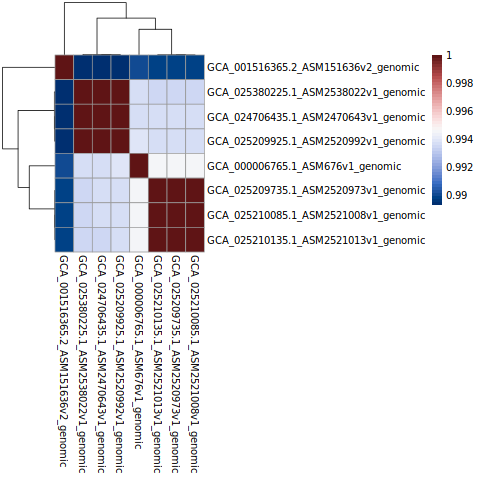

In [10]:
%%R
#We execute the library
library(pheatmap)

#The matrix is imported from the previous ANI analysis
matrix_ani <- read.csv('ANIm_output/ANIm_percentage_identity.tab', row.names=1, sep="\t")

#phetmap produces the matrix
#pheatmap(matrix_ani)
pheatmap(matrix_ani, color = hcl.colors(50, "Blue-Red 3"))

We can also import the ANIm original matrix, and use it to show the plot used in the paper:

In [11]:
!curl -L -o ANIm_percentage_identity.tab https://figshare.com/ndownloader/files/50762043

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5425  100  5425    0     0   3649      0  0:00:01  0:00:01 --:--:--  3649


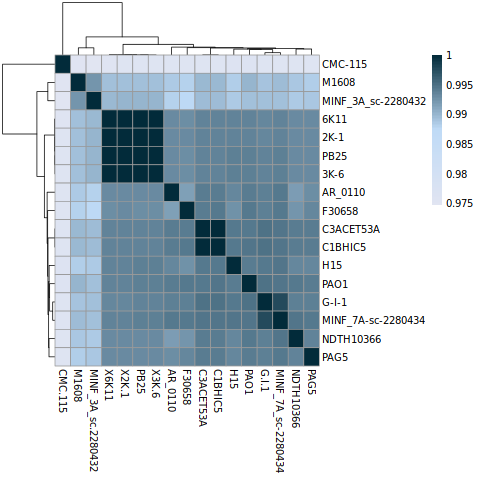

In [12]:
%%R
#We execute the library
library(pheatmap)

#The matrix is imported from the previous ANI analysis
matrix_ani <- read.csv('ANIm_percentage_identity.tab', row.names=1, sep="\t")

names(matrix_ani)[names(matrix_ani) == 'MINF_7A.sc.2280434'] <- 'MINF_7A_sc-2280434'
pheatmap(matrix_ani,
         cluster_rows = T,
         cluster_cols = T,
         color = colorRampPalette(c("#E1E5F2", "#BFDBF7", "#022B3A"))(100),
        )

For the pangenomic analysis, we used BAKTA and Panaroo. Panaroo was executed with the following commands:

In [13]:
#conda activate bakta
#for k in *.fna; do bakta $k --output "$k".bakta.output/ --prefix BAKTA_$k; done

# Create a directory called panaroo

#find /home/lgm/Documents/bb_ccastillo -name '*.gff3' -exec cp -t /home/lgm/Documents/bb_ccastillo_2/panaroo {} +

#cd panaroo
#conda activate panaroo
#panaroo -i *.gff3 -o ./results/ --clean-mode strict -a core -t 6

However, since we will not reproduce this exactly, we will import the pangenome. We will import the big one, for reproducibility purposes, and also the smaller one, that was used to plot the pangenome in a friendlier way, useful for publication:

In [14]:
!curl -L -o collapsed-gene-presence-absence.csv https://figshare.com/ndownloader/files/50760318
!curl -L -o gene-presence-absence.csv https://figshare.com/ndownloader/files/50760321

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  959k  100  959k    0     0   331k      0  0:00:02  0:00:02 --:--:--  565k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 8712k  100 8712k    0     0   701k      0  0:00:12  0:00:12 --:--:-- 1706k


The in-house script is also present in this repository. It requires for the `.csv` file to be in the same directory as the `bash` and `python` scripts.

In [15]:
%%bash

cp collapsed-gene-presence-absence.csv pan_upsetplot/gene_presence_absence.csv
bash pan_upsetplot/generateUpSet.sh -m 5

Minimum incidences taken for the plot: 5
Processing CSV file: ./pan_upsetplot/gene_presence_absence.csv


/home/marlen/miniforge3/envs/pseudomonas-environment/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/marlen/miniforge3/envs/pseudomonas-environment/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interm

Processing CSV file: ./pangenome_upsetplot.csv
Scripts executed successfully.


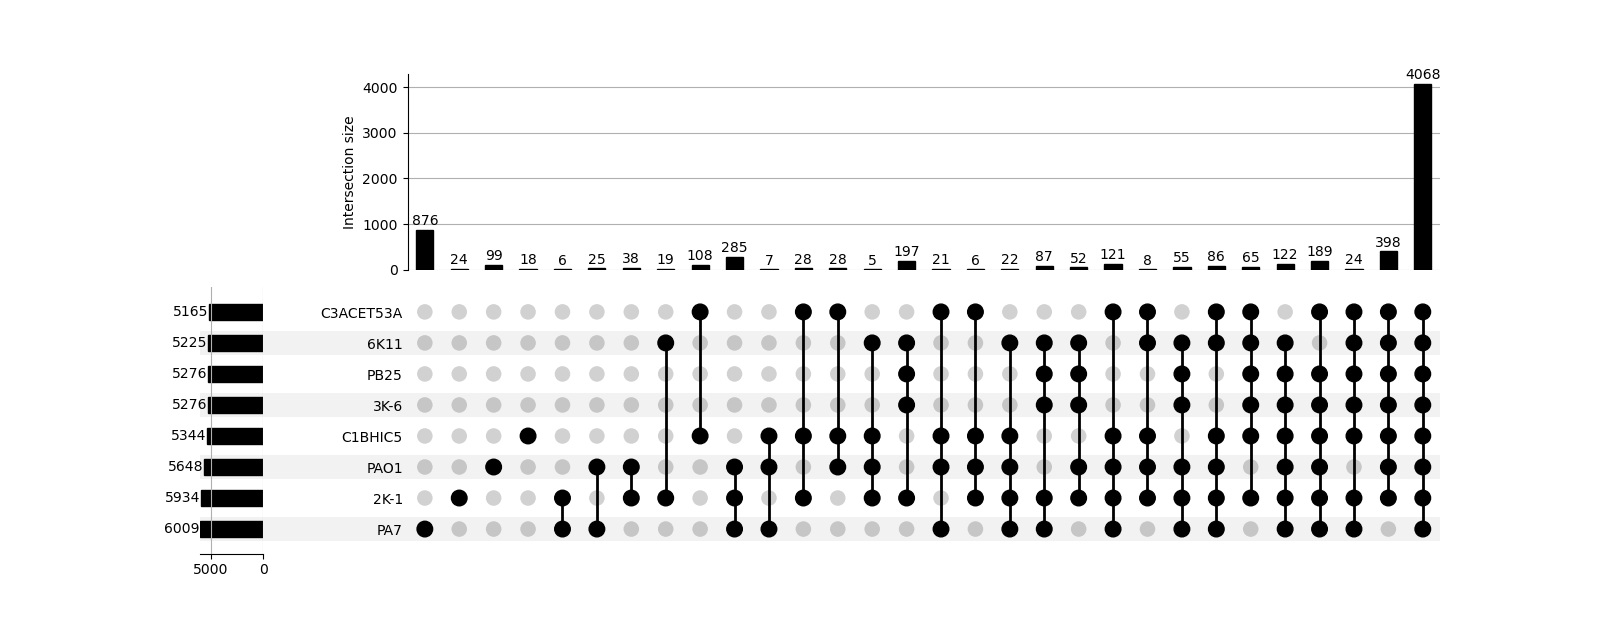

In [16]:
from IPython.display import display, Image
display(Image(filename="min_incidences.png"))

This is a collapsed version of the pangenome, displayed with 5 minimum incidences. We can also check the bigger `.csv` file and I will also display the upset plot if there is someone curious who wants to check it. This is the big presence-absence table, using 93 *P. aeruginosa* strains: 

In [17]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("gene-presence-absence.csv")

# Display the first 5 rows (default for head())
df.head()

,Gene,Non-unique Gene name,Annotation,12-4-4(59),19BR,213BR,2K-1,3K-6,6K11,8380,...,T38079,UCBPP-PA14,USDA-ARS-USMARC,VA-134,VRFPA04,W16407,W36662,W45909,W60856,YL84
0,group_12134,gabP;,GABA permease;Transport permease protein of ga...,JMMBJM_07600,PNLKAP_00695,PJBDKL_00700,PDAIHB_17870,PBCHDC_25240,KMNHBM_25145,GGFNJC_00670,...,AAKJJF_00710,IEAAEF_00665,IIINOC_00790,HANMGG_09735,LLPDOM_00680,GNDDBG_00680,MMJLPO_00925,DICGGG_00665,ALHHIO_00660,HGCGGG_03250
1,group_12133,lEA,water stress/hypersensitive response domain-co...,JMMBJM_07590,PNLKAP_00685,PJBDKL_00690,PDAIHB_17860,PBCHDC_25230,KMNHBM_25135,GGFNJC_00660,...,AAKJJF_00700,IEAAEF_00655,IIINOC_00780,HANMGG_09745,LLPDOM_00670,GNDDBG_00670,MMJLPO_00915,DICGGG_00655,ALHHIO_00650,HGCGGG_03260
2,group_12127,;mlaF,ATP-binding cassette domain-containing protein...,JMMBJM_00990,PNLKAP_25175,PJBDKL_25040,PDAIHB_14210,PBCHDC_05925,KMNHBM_05785,GGFNJC_24415,...,AAKJJF_25015,IEAAEF_23765,IIINOC_23665,HANMGG_16920,LLPDOM_05690,GNDDBG_25100;GNDDBG_25105,MMJLPO_25510,DICGGG_25610,ALHHIO_06080,HGCGGG_09955
3,group_12126,yajL,protease,JMMBJM_00370,PNLKAP_24555,PJBDKL_24420,PDAIHB_13590,PBCHDC_06545,KMNHBM_05165,GGFNJC_23795,...,AAKJJF_24395,IEAAEF_23145,IIINOC_23045,HANMGG_17545,LLPDOM_06310,GNDDBG_24480,MMJLPO_24890,DICGGG_24990,ALHHIO_06705,HGCGGG_10575
4,group_12121,fabB,beta-ketoacyl-ACP synthase I,JMMBJM_25255,PNLKAP_08410,PJBDKL_08645,PDAIHB_25050,PBCHDC_13250,KMNHBM_12710,GGFNJC_18775,...,AAKJJF_18470,IEAAEF_17860,IIINOC_17785,HANMGG_22620,LLPDOM_13405,GNDDBG_19375,MMJLPO_10505,DICGGG_18415,ALHHIO_21245,HGCGGG_16105


In [18]:
#%%bash

#cp gene-presence-absence.csv pan_upsetplot/gene_presence_absence.csv
#bash pan_upsetplot/generateUpSet.sh -m 5

We also used the core-gene alignment provided by Panaroo to generate the phylogeny for our tree. For this, we used RAxML, as featured here:

In [19]:
#modeltest−ng −i core_gene_alignment.aln -t ml
#!raxmlHPC-PTHREADS -f a -m GTRGAMMA -p 12345 -x 12345 -# 100 -s core_gene_alignment.aln -T 2 -n raxml_Pseudomonas

The final tree was edited using iTOL, but here we provide a fast visualization for reproducibility purposes:

ggtree v3.10.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

G Yu. Data Integration, Manipulation and Visualization of Phylogenetic
Trees (1st ed.). Chapman and Hall/CRC. 2022. ISBN: 9781032233574

Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods
for mapping and visualizing associated data on phylogeny using ggtree.
Molecular Biology and Evolution. 2018, 35(12):3041-3043.
doi:10.1093/molbev/msy194

Attaching package: ‘ape’

The following object is masked from ‘package:ggtree’:

    rotate



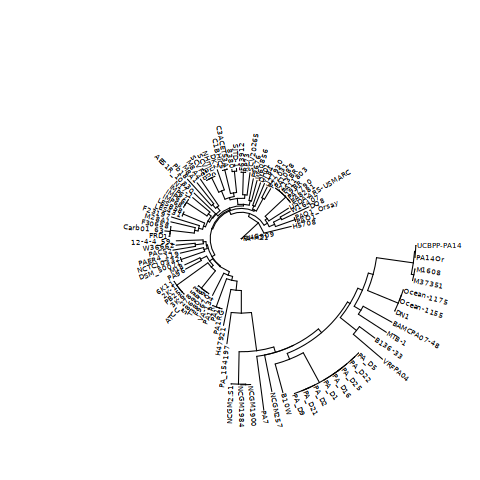

In [20]:
%%R
library(ggtree)
library(ape)

tree <- read.tree("intermediate_data/tree_pseudomonas_final.newick")

ggtree(tree, layout = "circular") + geom_tiplab(size = 2.5)

To generate our gene synteny blocks, we used R packages like gggenomes. We used `tblastx` as featured in the NCBI page. We compared contig by contig, finally obtaining the desired alineations. `gggenomes` is currently unavailable through conda, so it is not possible to recreate the obtained plot as is appears on the paper. However, this is the code used. They are applied as follows: